# Overfitting and Underfitting

Hey! Hope you all are enjoying the tutorials. In this segment we are going to learn about the most common issues that arise during modeling the data and the ways to handle them. Let's get started!

### What is Overfitting?

If you have worked on Machine Learning models you would have come across a case where your models works perfectly on training data but fails on unseen data. This is in Supervised learning, where the idea is to generalize on never seen data. 

Let us consider a case of a linear regression model. We can see from the image that the model is trying to learn every data point to an extent where it also captures the noise.  But when a new point is given as an input, the model wouldn't be able to capture the data point and generalize it. This is called Overfitting.

In linear regression, the aim is to reduce the total cost i.e. the distance between the line generated(straight line) and the input data points. The problem of overfitting may arise when there are multiple iterations during the training of a large dataset. During the training the model would have learnt the noise and hence fails to generalize. Now think of what data size is a perfect size to train.  

### What is Underfitting?

A model is said to have underfitting when it can't learn the underlying trend A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data i.e. neither model the training data nor generalize to new data. Reasons could be lesser number of datapoints to train, high bias and low variance, the model is not complex enough or bad feature engineering.  One simple remedy is to use another algorithm.

### Examples for Overfitting and Underfitting

Let us now explore the above issues with the help of a dataset. I have chosen a dataset from Kaggle. - House Sales in King County, USA. You may choose any dataset you want to as you will not be escaping either of two problems and will be encountering those :)

Note - I will be performing basic EDA and feature selection for modelling, but remember doing these steps with extra caution would help you mitigate overfitting and Underfitting

In [ ]:
#import required packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Chosing 1st 1000 rows 
df = pd.read_csv("kc_house_data.csv")
df = df

Understand attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Set target variable

In [ ]:
target = df['price']
df.drop(['id', 'date', 'price'], axis=1, inplace=True)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Check correlation between variables and drop correlated variables

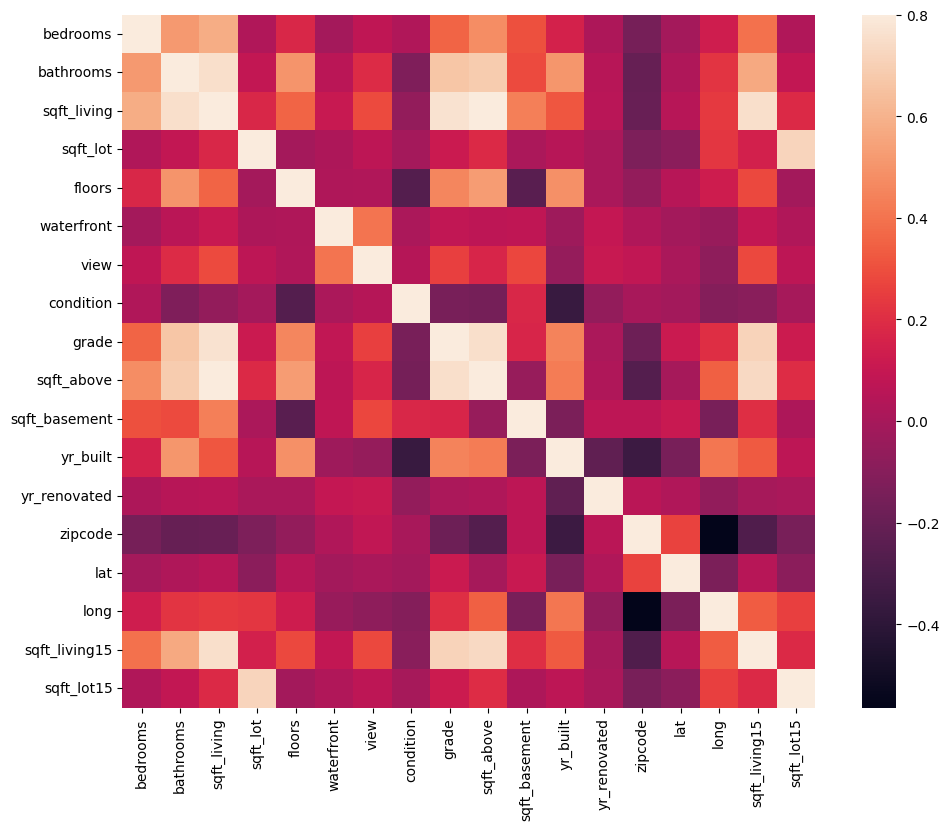

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
df.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
2,2,1.00,770,10000,1.0,0,0,3,6,770,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0


Standardize variables

In [ ]:
y = target
X = df
#X = (X - np.average(X)) / (np.std(X))

Train test Splits

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((17290, 11), (4323, 11), (17290,), (4323,))

Let's model the data with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
reg = LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

Test Accuracy(R2)

In [ ]:
r2_score = reg.score(X_val,y_val)
print(r2_score*100,'%')

60.9335613929291 %


Train Accuracy(R2)

In [ ]:
r2_score = reg.score(X_train,y_train)
print(r2_score*100,'%')

60.333380604052465 %


Inference - We can observe that the Train Accuracy and Test Accuracy are almost same. The model is clearly not overfitting. But is it underfitting? Yes! Do you think I should be changing the dataset size and remodel with different sizes? Yes, I did try that, but the maximum accuracy I got was 65% for the dataset size 3000. Yet, this isn't a good model either. Nobody would want to use a model that can neither learn the data nor predict rightly. So let's now find a way out for this. Let's try a different algorithm

Let's try ExtraTreesRegressor

To learn more about the algorithm visit - https://machinelearningmastery.com/extra-trees-ensemble-with-python/

The training takes too long, hence using first 1000 rows

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor().fit(X_train, y_train)


Test Accuracy

In [ ]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.688413379207439


Train Accuracy

In [ ]:
X_pred = (model.predict(X_train))
print(model.score(X_train, y_train))

0.9992315270234264


Inference -  We can clearly see that the train accuracy is way too high than the test accuracy. This is called Overfitting. The model is able to do a great job on training data but has poor performance on the testing data. In the next tutorial we will be seeing on ways to mitigate overfitting and k-fold cross validation for parameter tuning, model selection and feature selection. We will be revisiting this dataset and try a different approach. Cheers!

Overfitting and Underfitting by Ajay Sadananda is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).